In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm




In [7]:

X = torch.load('KEdataX_1690854612.274382.pt')
y = torch.load('KEdataY_1690854612.2767599.pt')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)



In [8]:
X_load

tensor([[ 533.1155, -896.1728],
        [ 380.4256, -623.4555],
        [ 731.0184,  840.6921],
        ...,
        [ 618.0392, -465.8149],
        [ 474.1715, -803.7261],
        [ 563.0712, -378.6703]])

In [9]:
X

tensor([[ 533.1155, -896.1728],
        [ 380.4256, -623.4555],
        [ 731.0184,  840.6921],
        ...,
        [ 618.0392, -465.8149],
        [ 474.1715, -803.7261],
        [ 563.0712, -378.6703]])

In [10]:
y_load

tensor([753.2379, 510.8709, 483.4100,  ..., 175.5419, 681.1624, 127.3295])

In [11]:
y

tensor([753.2379, 510.8709, 483.4100,  ..., 175.5419, 681.1624, 127.3295])

In [14]:
1e-2

0.01

In [20]:
(y_pred/y_test)

tensor([[ 1.1347e+00],
        [ 5.0438e-01],
        [ 3.8242e-02],
        ...,
        [-2.7791e-04],
        [ 6.1725e+00],
        [ 3.2363e-02]], grad_fn=<DivBackward0>)

In [23]:
torch.Size(y_pred/y_test)

TypeError: ignored

In [24]:
(y_pred/y_test)[0][0]


tensor(1.1347, grad_fn=<SelectBackward0>)

In [25]:
(y_pred/y_test)[0]


tensor([1.1347], grad_fn=<SelectBackward0>)

In [26]:
(y_pred/y_test)[0][0][0]


IndexError: ignored

In [28]:
(y_pred/y_test).item()

RuntimeError: ignored

In [30]:
tensor.detach().numpy(y_pred/y_test)

NameError: ignored

In [32]:
(y_pred/y_test).cpu().detach().numpy()

array([[ 1.1347344e+00],
       [ 5.0437880e-01],
       [ 3.8241554e-02],
       ...,
       [-2.7790904e-04],
       [ 6.1725154e+00],
       [ 3.2362808e-02]], dtype=float32)

In [33]:
before_loss_twos

tensor([2., 2., 2.,  ..., 2., 2., 2.])

Bsize: 500 learningRate: 0.03
0 loss: 292022.59375
50 loss: 33276884.0
100 loss: 9756187.0
150 loss: 6334646.0
200 loss: 1172832.5
250 loss: 416124.3125
300 loss: 13892962.0
350 loss: 5200166.0
400 loss: 6949390.5
450 loss: 247771.28125
500 loss: 37419884.0
550 loss: 2607500.75
600 loss: 3690037.25
650 loss: 953043.9375
700 loss: 22540682.0
750 loss: 1029943.0
800 loss: 1239522.5
850 loss: 405639.03125
900 loss: 326340.5625
950 loss: 347161.4375
1000 loss: 265663.28125
Bsize: 500 learningRate: 0.03 RMSE: 111.31 1000 loss: 515.4253401318177


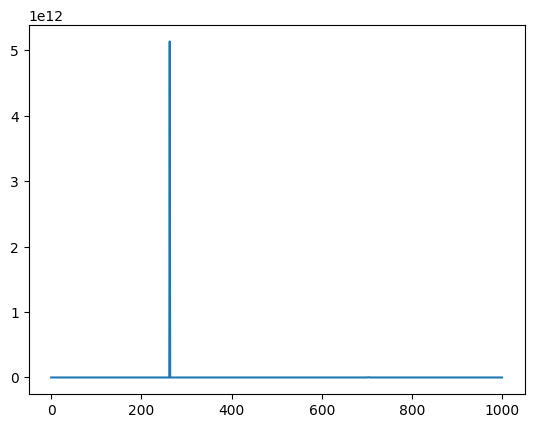

In [45]:
#default

"""


"""
# for learningRate in range(10): #



for Bsize in [500]:
    print('Bsize:', Bsize, end =' ')
    before_loss_twos =  torch.ones(Bsize, dtype=torch.float32)*2
    for learningRate in [  3 * 1e-2 ]:
        print('learningRate:', learningRate)
        # Define the model
        model = nn.Sequential(
            nn.Linear(2, 3),
            nn.LeakyReLU(),
            nn.Linear(3, 2),
            nn.LeakyReLU(),
            nn.Linear(2, 1)
        )

        # loss function and optimizer
        loss_fn = nn.MSELoss()  # mean square error
        optimizer = optim.Adam(model.parameters(), lr=learningRate  )  # 10 loss: 5157042688.0

        n_epochs = 1000+1   # number of epochs to run
        batch_size = Bsize  # size of each batch
        batch_start = torch.arange(0, len(X_train), batch_size)

        # Hold the best model
        best_mse = np.inf   # init to infinity
        best_weights = None
        history = []

        for epoch in range(n_epochs):
            model.train()
            with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
                bar.set_description(f"Epoch {epoch}")
                for start in bar:
                    # take a batch
                    X_batch = X_train[start:start+batch_size]
                    y_batch = y_train[start:start+batch_size]
                    # forward pass
                    y_pred = model(X_batch)

                    before_loss = y_pred/y_batch + y_batch/y_pred


                    loss = loss_fn(before_loss, before_loss_twos)
                    # backward pass
                    optimizer.zero_grad()
                    loss.backward()
                    # update weights
                    optimizer.step()
                    # print progress
                    bar.set_postfix(mse=float(loss))
            # evaluate accuracy at end of each epoch
            model.eval()
            y_pred = model(X_test)

            before_loss = y_pred/y_test + y_test/y_pred

            mse = loss_fn(before_loss, before_loss_twos)

            mse = float(mse)
            history.append(mse)
            if mse < best_mse:
                best_mse = mse
                best_weights = copy.deepcopy(model.state_dict())

            if epoch % 50 == 0:
                print(epoch, 'loss:', mse)

        # restore model and return best accuracy
        model.load_state_dict(best_weights)
        # print("MSE: %.2f" % best_mse)
        # print("RMSE: %.2f" % np.sqrt(best_mse))
        print('Bsize:', Bsize ,'learningRate:', learningRate , "RMSE: %.2f" % np.sqrt(best_mse), epoch , 'loss:', np.sqrt(mse) )
        plt.plot(history)
        plt.show()

In [ ]:
# when create new data

# N, D_in, H, D_out = 64, 1000, 100, 10
N, D_in, D_out = 100000, 2, 1

# 입력과 출력 위한 랜덤 텐서
X = []
y = []
for j in range(N):
    X.append([])
    #y.append([])
    for i in range(D_out):
        X[-1].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
        X[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y.append( (X[-1][-1]**2) / (2*X[-1][-2])  )


X = torch.Tensor(X)
y = torch.Tensor(y)

# nn package를 이용하여 여러 층으로 정의된 모델 생성
# nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
# Linear 모듈은 곧 Affine 모듈

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation

import time
# >>> # Save to file
# >>> x = torch.tensor([0, 1, 2, 3, 4])
# >>> torch.save(x, 'tensor.pt')

torch.save(X, 'KEdataX_'+str(time.time())+'.pt' )
torch.save(y, 'KEdataY_'+str(time.time())+'.pt' )
